<a href="https://colab.research.google.com/github/KelynBT/Test_IF/blob/main/IF_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Probabilidad de Readmisión de Pacientes a partir del Conjunto de Datos Diabetes 130-US hospitals for years 1999-2008** 

Se trabajará con el dataset 
***Diabetes 130-US hospitals for years 1999-2008*** publicado por **UC Irvine Machine Learning Repository** en [su web](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#). Los datos fueron recopilados  para analizar los factores relacionados principalmente con la readmisión, y con otros resultados asociados a los pacientes con diabetes.

De acuerdo con los autores del conjuto de datos, este contiene información relacionada con la atención clínica en 130 hospitales y redes integradas de prestación de servicios de EE. UU, recopilada durante 10 años (1999-2008). Incluye más de 50 características que representan los resultados del paciente y del hospital y organizadas en función de los ingresos que cumplieron con los siguientes criterios.

1. Es un ingreso hospitalario (una admisión hospitalaria).

2. Es un ingreso diabético, es decir, durante el cual se ingresó al sistema cualquier tipo de diabetes como diagnóstico.

3. La duración de la estancia fue de al menos 1 día y como máximo 14 días.

4. Se realizaron pruebas de laboratorio durante la estancia.

5. Se administraron medicamentos durante la estancia.


Los datos contienen atributos tales como: número de paciente, raza, sexo, edad, tipo de admisión, tiempo en el hospital, especialidad médica del profesional de la salud que lo admite, número de pruebas de laboratorio realizadas, resultado de la prueba de HbA1c, diagnóstico, cantidad de medicación, medicamentos para diabéticos, cantidad de pacientes ambulatorios , visitas hospitalarias y urgentes en el año anterior a la hospitalización, etc. Para cada registro existe uno de los siguientes resultados:

- No readmisión

- Readmisión en menos de 30 días (esta situación no es buena, porque existe la posibilidad de que el tratamiento aplicado no fue apropiado);

- Readmisión después de 30 días (esta situación tampoco es buena, sin embargo, la razón podría estar relacionada con el estado del paciente).

### **Paso 1:** Importar librerías de uso frecuente en el análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 


### **Paso 2:** Importar datos desde archivo .csv

In [2]:
df_ingresos = pd.read_csv('https://raw.githubusercontent.com/KelynBT/Test_IF/main/Dataset/diabetic_data.csv')

Después de cargar el dataset se obseva que el conjunto de datos contiene 101766 observaciones y 50 características. El objetivo inicial es familiarizarse con el conjunto de datos y prepararlo realizando algunos análisis estadísticos preliminares, la transformación de variables, el tratamiento de los valores NA, etc.

In [3]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df_ingresos.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


###  **Paso 3: Análisis Exploratorio de los Datos - EDA**

El conjunto de datos tiene en muchas variables registrado el caracter '?', que probablemente indica que falta un valor, por lo que se procede a sustituirlo por NA para poder gestionarlo mejor.

In [5]:
df_ingresos.replace({'?': np.NAN},inplace=True)

### **Missing Values**

Al examinar el dataset se encuentra que los datos que faltan pertenecen apenas a cinco de las 49 características. La tabla siguiente resume el porcentaje de datos que faltan para cada una de estas 5 características. Podemos ver que, para algunas variables como el peso, el número de registros ausentes es extremadamente alto.

In [6]:
na_ratio = ((df_ingresos.isnull().sum() / len(df_ingresos))*100).sort_values(ascending = False)
#Missing_Values = ['%']
na_ratio.index.name =' '
na_ratio=na_ratio.to_frame().T.round(2)
na_ratio.rename(index={0 :'Missing_Values (%)'})


,weight,medical_specialty,payer_code,race,diag_3,diag_2,diag_1,num_procedures,max_glu_serum,number_diagnoses,number_inpatient,number_emergency,number_outpatient,num_medications,readmitted,num_lab_procedures,diabetesMed,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,age,gender,patient_nbr,A1Cresult,metformin,repaglinide,nateglinide,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,encounter_id
Missing_Values (%),96.86,49.08,39.56,2.23,1.4,0.35,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


La correspondiente cantidad de datos no nulos puede apreciarse en la siguiente gráfica de barras generada para reflejar los valores correspondientes a cada una de las columnas.

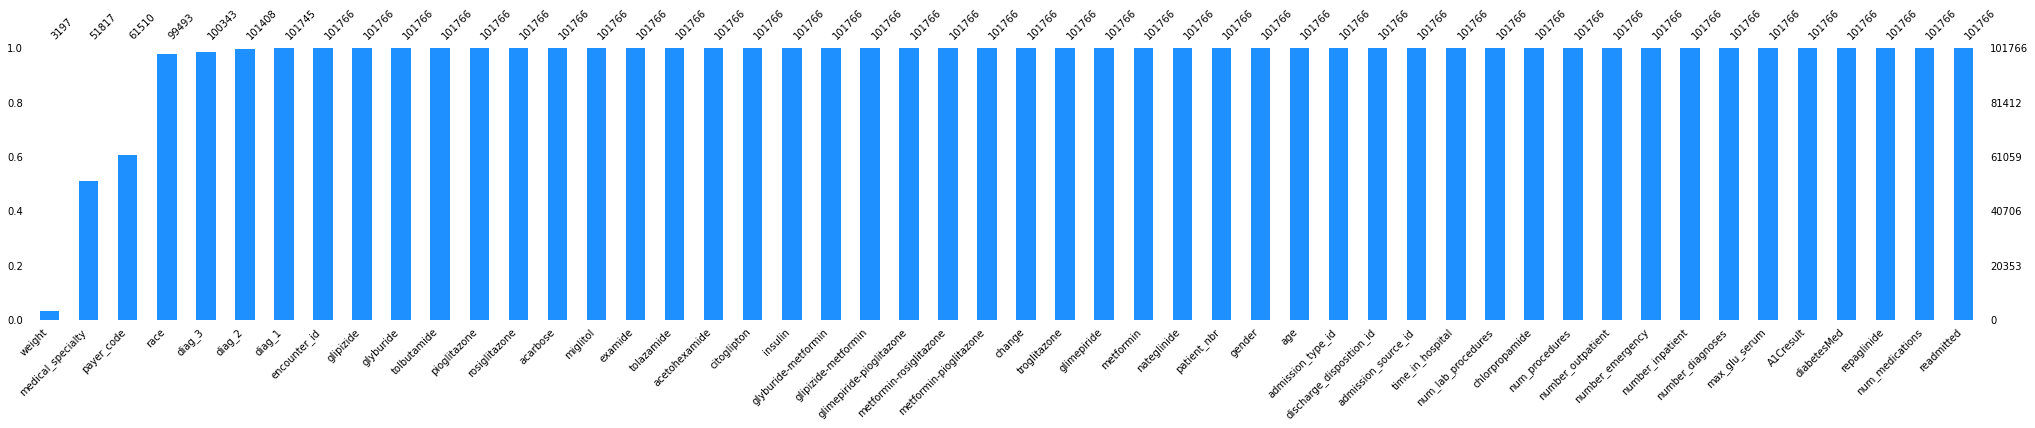

In [7]:
msno.bar(df_ingresos, color="dodgerblue", sort="ascending",figsize=(35,5), fontsize=10 )

Para observar como se encuentran distribuidos los datos ausentes a lo largo de cada columna se realiza un gráfico de la matriz de datos ausentes con el fin de verificar si existe algún patrón visual entre ellos. Paa este caso las ausencias parecen ser completamente aleatorias.

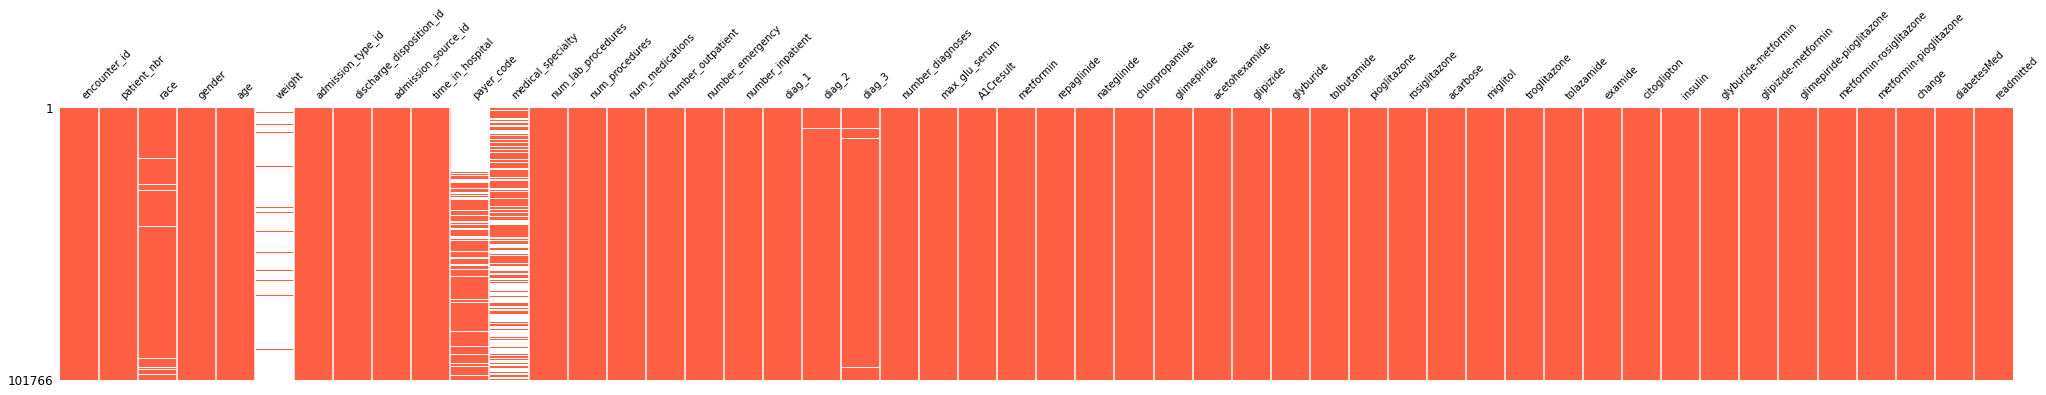

In [8]:
msno.matrix(df_ingresos, sparkline=False, color=(1, 0.38, 0.27),figsize=(35,5), fontsize=10 ) 

Por último, vamos a ver el mapa de calor de correlación de nulidad, que nos indica en qué medida la presencia o ausencia de una variable afecta a otra.

- Un valor cercano a -1 significa que si una variable aparece, es muy probable que la otra variable no aparezca
- Un valor cercano a 0 significa que no hay dependencia entre la aparición missing values de dos variables.
- Un valor cercano a 1 significa que si aparece una variable es muy probable que la otra esté presente.

Por lo anterior, tras verificar en el gráfico se encuentra que, en términos generales, no hay una dependencia significativa entre la aparición de valores ausentes presentes en las variables analizadas.

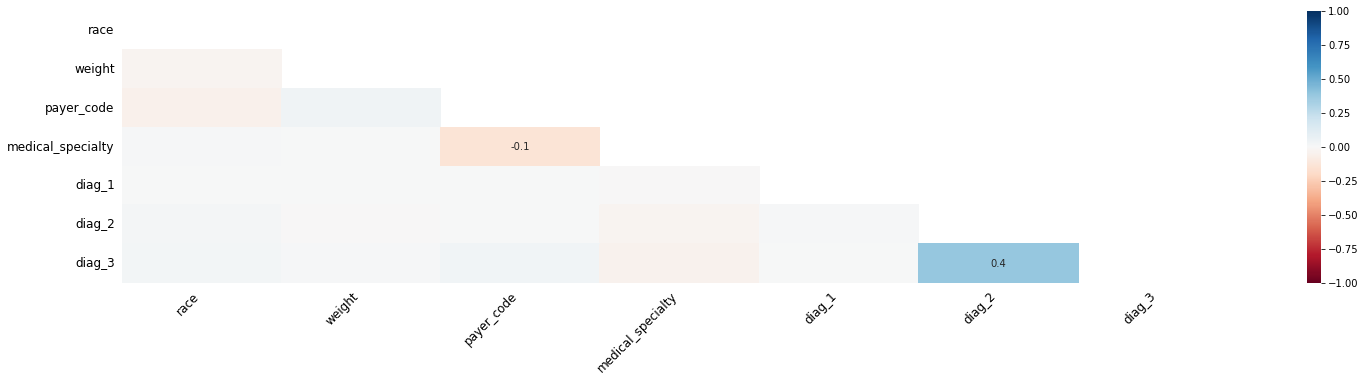

In [9]:
msno.heatmap(df_ingresos, figsize=(25,5), fontsize=12) 

Para hacer frente a los valores ausentes, se consideró un umbral del 30%, de forma que las variables con valores ausentes superiores al 30% se eliminan del dataset. Por lo tanto, las variables weight, payer_code y medical_specialty se borran del conjunto de datos. Las otras variables, se dejan como están por ahora, para analizar posteriormente cuál es la mejor estrategia para abordar tales ausencias.

In [10]:
df_ingresos.drop(['weight','medical_specialty','payer_code'], axis=1, inplace=True)
len(df_ingresos.columns)

47

### **Duplicados**

El conjunto de datos contiene varias filas con el mismo número de paciente (ID de paciente). No está claro si los múltiples encuentros entre médicos y pacientes, es decir, las visitas, son independientes. Existe el riesgo de que estas múltiples visitas de un paciente puedan estar relacionadas, y por tanto puedan introducir sesgos, ya que algunos encuentros de un paciente pueden estar correlacionados. Para eliminar este riesgo, se decide mantener solo un encuentro registrado por paciente, aquel que tuvo el tiempo máximo en el hospital, asumiendo que el tiempo en el hospital es significativo para la readmisión y presenta una varianza suficiente en los datos de entrenamiento. Una vez hecho esto, se elimina la variable de identificación del paciente y la variable de identificación del encuentro. Por lo tanto, el conjunto de datos se reduce a 45 variables y 71518 observaciones.

In [11]:
df_ingresos = df_ingresos.drop_duplicates()
display(df_ingresos['patient_nbr'].duplicated().sum())
df_ingresos.sort_values('time_in_hospital', inplace=True)
df_ingresos.drop_duplicates('patient_nbr', keep="last", inplace=True)
display(df_ingresos['patient_nbr'].duplicated().sum())

30248

0

In [12]:
df_ingresos.drop(['patient_nbr','encounter_id'], axis=1, inplace=True)
df_ingresos.shape

(71518, 45)

Identificar columnas que solo tienen registrado un valor, pues al tener un valor constante no aportan ninguna información significativa.

In [13]:
nZV=[i for i in list(df_ingresos) if len(df_ingresos[i].unique()) == 1]
print(nZV)

['examide', 'citoglipton', 'glimepiride-pioglitazone']


Eliminar las columnas nZV

In [14]:
df_ingresos.drop(nZV, axis=1, inplace=True)

In [15]:
len(df_ingresos.columns)

42

### **Valores Nulos**

Se verifica la cantidad de nulos por columna, se encuentran cuatro columnas con valores ausentes, las cuáles son: race, diag_1, diag_2, y diag_3. Para la variable race, se decide eliminar los valores faltantes, lo que disminuye el número de observaciones a 69601 pacientes. Los valores NA de las variables de diagnóstico se asignan a la categoría "Others". 

In [16]:
df_ingresos.isnull().sum().sort_values(ascending=False)

race                        1917
diag_3                      1149
diag_2                       287
diag_1                        12
number_outpatient              0
A1Cresult                      0
max_glu_serum                  0
number_diagnoses               0
number_inpatient               0
number_emergency               0
num_medications                0
diabetesMed                    0
num_procedures                 0
num_lab_procedures             0
time_in_hospital               0
admission_source_id            0
discharge_disposition_id       0
admission_type_id              0
age                            0
gender                         0
metformin                      0
readmitted                     0
nateglinide                    0
chlorpropamide                 0
change                         0
metformin-pioglitazone         0
metformin-rosiglitazone        0
glipizide-metformin            0
glyburide-metformin            0
insulin                        0
tolazamide

In [17]:
df_ingresos.drop(df_ingresos[df_ingresos.race.isnull()].index, inplace = True)

In [18]:
df_ingresos.race.isnull().sum()

0

In [19]:
df_ingresos.shape

(69601, 42)

### **Revisión de Consistencia de los Datos**

Verfificar el contenido de cada Columna y contrastar con el tipo de dato asignado

In [20]:
 [{column:df_ingresos[column].unique()} for column in df_ingresos.columns] 

[{'race': array(['Caucasian', 'AfricanAmerican', 'Other', 'Hispanic', 'Asian'],
        dtype=object)},
 {'gender': array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)},
 {'age': array(['[0-10)', '[50-60)', '[40-50)', '[70-80)', '[60-70)', '[20-30)',
         '[80-90)', '[30-40)', '[90-100)', '[10-20)'], dtype=object)},
 {'admission_type_id': array([6, 1, 3, 2, 5, 8, 7, 4])},
 {'discharge_disposition_id': array([25,  1, 11,  7,  4,  2,  3,  6,  8, 22, 12,  5, 18, 28, 14, 13, 19,
         23,  9, 24, 20, 16, 15, 27, 10, 17])},
 {'admission_source_id': array([ 1,  7,  4, 17,  2,  6,  5,  3,  8,  9, 20, 11, 10, 13, 14, 25, 22])},
 {'time_in_hospital': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
 {'num_lab_procedures': array([ 41,  50,  40,  19,  36,  61,   2,   3,  28,  30,  23,   7,  55,
          26,  20,  39,  21,  34,  11,  47,  44,  58,  29,  38,   8,  51,
           1,   6,  57,  10,  45,  32,  59,   4,  53,  68,  27,  43,  25,
          31,  35,  16,  6

In [21]:
df_ingresos.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

La mayoría de los tipos de datos estan correctos, excepto tres características que aparecen como numéricas pero son categóricas:

- admission_type_id
- discharge_disposition_id
- admission_source_id

No se consideran todas las categorías, solamente aquellas con mayor representatividad, esto para disminuir la cantidad de variables dummie que se puedan generar.

In [22]:
  df_ingresos['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Others_disch' for val in df_ingresos['discharge_disposition_id']], index=df_ingresos.index)
  df_ingresos['admission_source_id'] = pd.Series(['Emergency_Room' if val == 7 else 'Referral' if val == 1 else 'Others_sourc' for val in df_ingresos['admission_source_id']], index=df_ingresos.index)
  df_ingresos['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Urgent' if val==2 else 'Others_adm'for val in df_ingresos['admission_type_id']], index=df_ingresos.index)

Tras revisar el contenido de valores únicos por columnas, se observan tres features de tipo categórico que tienen una cantidad significativa de opciones, mayor a 600: 

- diag_1
- diag_2
- diag_3

Para representar tal cantidad de opciones se requeriría alrededor de 900 variables dummie y los costos computacionales asociados serían elevados y díficiles de garantizar. Para consolidar los niveles de estas tres variables, se sigue la regla de la Tabla 2 del artículo académico citado por los autores del dataset, disponible en: https://www.hindawi.com/journals/bmri/2014/781670/. Así, las categorías se reducen a 3 categorías (tres de los más representativos diagnósticos: Circulatory(1), Respiratory(2), Diabetes(3)) 

In [23]:
print(f'diag_1: {len(df_ingresos.diag_1.unique())}')  
print(f'diag_2: {len(df_ingresos.diag_2.unique())}')   
print(f'diag_3: {len(df_ingresos.diag_3.unique())}')  

diag_1: 689
diag_2: 723
diag_3: 750


Ahora, se definen las listas para crear las tres categorías en las variables de diagnóstico, considerando: -
- Circulatory: ICD9 Codes -> 390–459, 785
- Respiratory: ICD9 Codes -> 460–519, 786
- Diabetes: ICD9 Codes -> 250.xx

In [24]:
c = [str(x) for x in list(range(390,460))]
c.append('785')
r = [str(x) for x in list(range(460,520))]
r.append('786')

In [25]:
df_ingresos['diag_1'] = df_ingresos['diag_1'].replace(c,2)
df_ingresos['diag_1'] = df_ingresos['diag_1'].replace(r,3)
df_ingresos['diag_1'] = np.where(df_ingresos["diag_1"].str.startswith('250', na = False), 1, df_ingresos['diag_1'])
df_ingresos['diag_1'] = np.where(~df_ingresos.diag_1.isin([1, 2, 3]), 0, df_ingresos['diag_1'])

In [26]:
df_ingresos['diag_2'] = df_ingresos['diag_2'].replace(c,2)
df_ingresos['diag_2'] = df_ingresos['diag_2'].replace(r,3)
df_ingresos['diag_2'] = np.where(df_ingresos["diag_2"].str.startswith('250', na = False), 1, df_ingresos['diag_2'])
df_ingresos['diag_2'] = np.where(~df_ingresos.diag_2.isin([1, 2, 3]), 0, df_ingresos['diag_2'])

In [27]:
df_ingresos['diag_3'] = df_ingresos['diag_3'].replace(c,2)
df_ingresos['diag_3'] = df_ingresos['diag_3'].replace(r,3)
df_ingresos['diag_3'] = np.where(df_ingresos["diag_3"].str.startswith('250', na = False), 1, df_ingresos['diag_3'])
df_ingresos['diag_3'] = np.where(~df_ingresos.diag_3.isin([1, 2, 3]), 0, df_ingresos['diag_3'])

In [28]:
df_ingresos['diag_1']=df_ingresos['diag_1'].astype(int)
df_ingresos['diag_2']=df_ingresos['diag_2'].astype(int)
df_ingresos['diag_3']=df_ingresos['diag_3'].astype(int)

S verifica que los cambios realizados en las variables *diag_1, diag_2 y diag_3* se realizaron de forma correcta

In [29]:
print(df_ingresos['diag_1'].unique())
print(df_ingresos['diag_2'].unique())
print(df_ingresos['diag_3'].unique())

[1 3 2 0]
[0 1 2 3]
[0 2 1 3]


En la columna 'gender' se observaron tres categorías: masculino, femenino y uknown, por lo que se procede a eliminar los registros que no corresponden a femenino o masculino.

In [30]:
df_ingresos.drop(df_ingresos[df_ingresos['gender'] == 'Unknown/Invalid'].index, inplace = True)

### **Unbalanced Features**

Se grafican los valores de la variable 'age' para verificar qué tan balanceados están. El gráfico obtenido muestra que estan significativamente desbalanceados por lo que se reagrupan en 6 nuevas categorías.

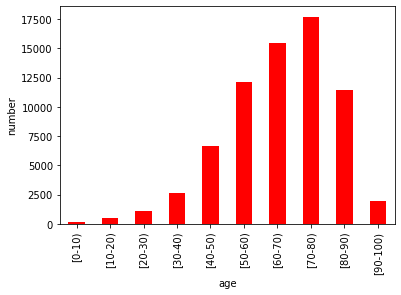

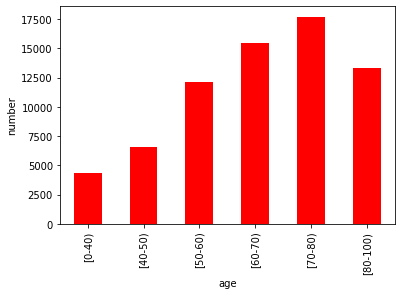

In [31]:
  df_ingresos.groupby('age').size().plot(kind='bar',color='red')
  plt.ylabel('number')
  plt.show()
  #the data of age is unbalanced
  df_ingresos['age'] = pd.Series(['[0-40)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)'] else val
                             for val in df_ingresos['age']], index=df_ingresos.index)
  df_ingresos['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val
                             for val in df_ingresos['age']], index=df_ingresos.index)
  df_ingresos.groupby('age').size().plot(kind='bar',color='red')
  plt.ylabel('number')
  plt.show()

De igual forma se inspecciona visualmente las categorías de las otras Features para determinar qué tan desbalanceadas estan.

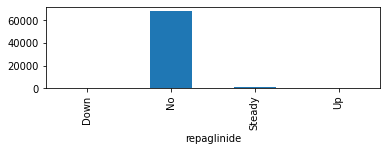

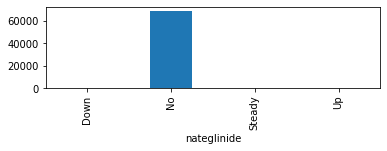

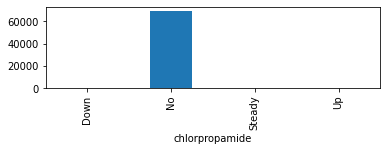

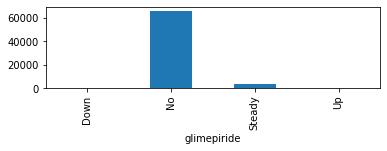

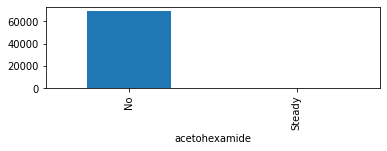

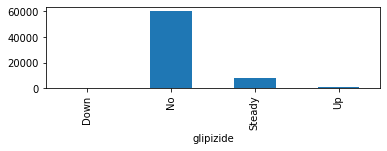

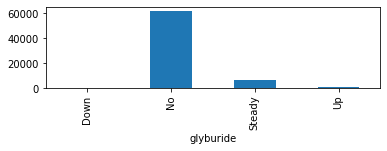

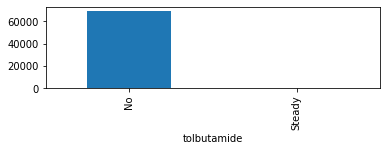

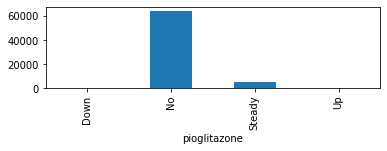

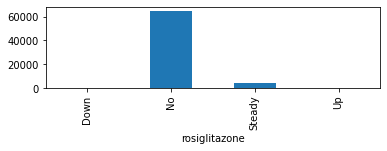

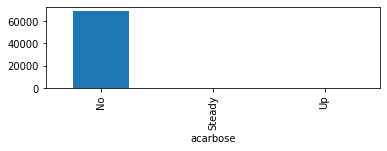

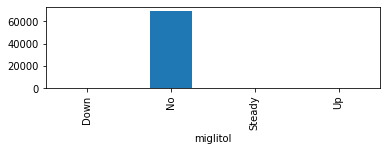

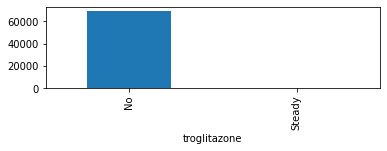

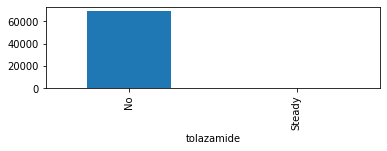

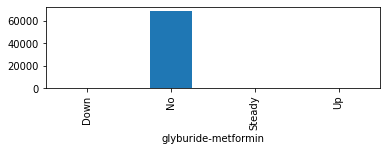

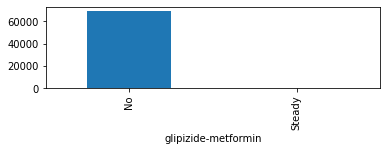

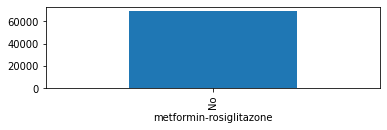

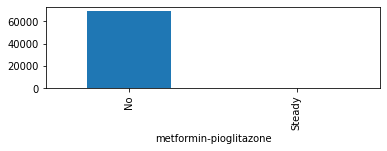

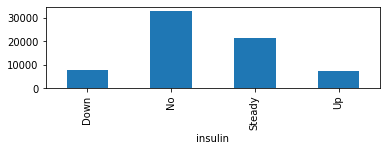

In [32]:
features=['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 
          'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin','metformin-rosiglitazone', 'metformin-pioglitazone','insulin']


for i in range(1,20):
  df_ingresos.groupby(features[i]).size().plot(kind='bar', figsize=(6,1.5))
  plt.show()   
    

En los gráficos se observa que a excepción de la insulina, las features graficadas presentan un desbalance significativo de categorías. Por lo anterior, se decide eliminarlas.

In [33]:
df_ingresos.drop(features[:-1], axis=1, inplace=True)

In [34]:
df_ingresos.shape

(69600, 23)

### **Target**

Se inspecciona visualmente el Target. En el gráfico se aprecia que la salida esta significativamente desbalanceada entre los casos en los que hubo readmisión independientemente del tiempo y los que no terminaron en readmisión. Por lo anterior se decide juntar las readmisiones y se le asigna el valor 1, mientras que se usa 0 para los casos de NO readmitidos.

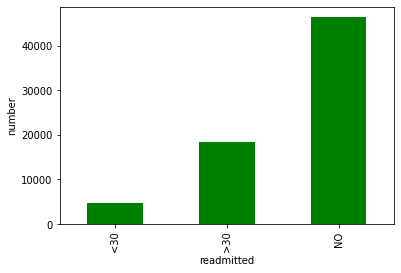

In [35]:
  df_ingresos.groupby('readmitted').size().plot(kind='bar',color='green')
  plt.ylabel('number')
  plt.show()

In [36]:
df_ingresos['readmitted'] = np.where(df_ingresos["readmitted"]!='NO', 0, df_ingresos['readmitted'])
df_ingresos['readmitted'] = df_ingresos['readmitted'].replace('NO',1)

### **Variables Numéricas**

Se verifican las principales estadísticas de los datos. Se observa una cantidad de outliers representativa en varias de las variables numéricas, sin embargo, inicialmente se decide no realizar ninguna acción sobre ellos.

In [37]:
df_ingresos.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
count,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000,69600.000000
mean,4.767974,44.137313,1.488563,16.405862,0.310029,0.127672,0.343132,1.089138,1.066422,0.974914,7.364799,0.667572
std,3.184319,19.990540,1.775577,8.608399,1.138306,0.655392,0.839506,1.148439,1.085690,1.020967,1.964694,0.471087
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,1.000000
75%,7.000000,58.000000,2.000000,21.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,9.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,63.000000,19.000000,3.000000,3.000000,3.000000,16.000000,1.000000


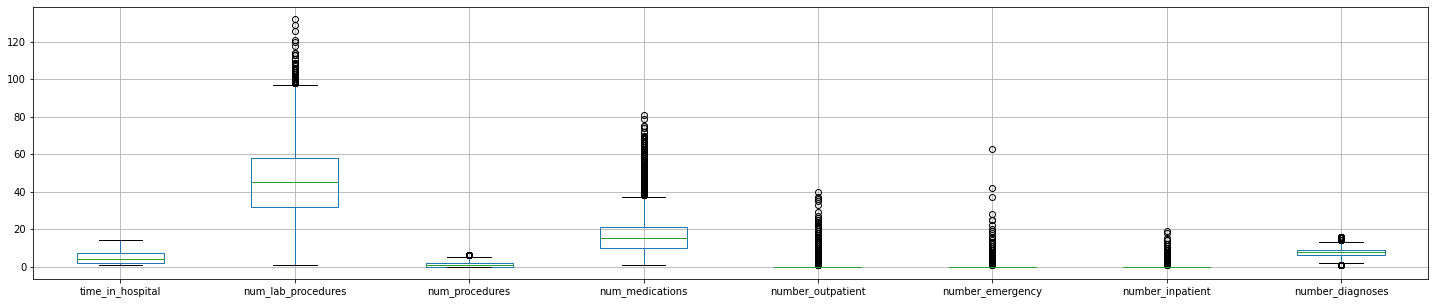

In [38]:
df_ingresos.boxplot(column=['time_in_hospital',	'num_lab_procedures',	'num_procedures',	'num_medications',	'number_outpatient',	'number_emergency',	'number_inpatient',	'number_diagnoses'], figsize=(25,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa67a46810>,
      dtype=object)

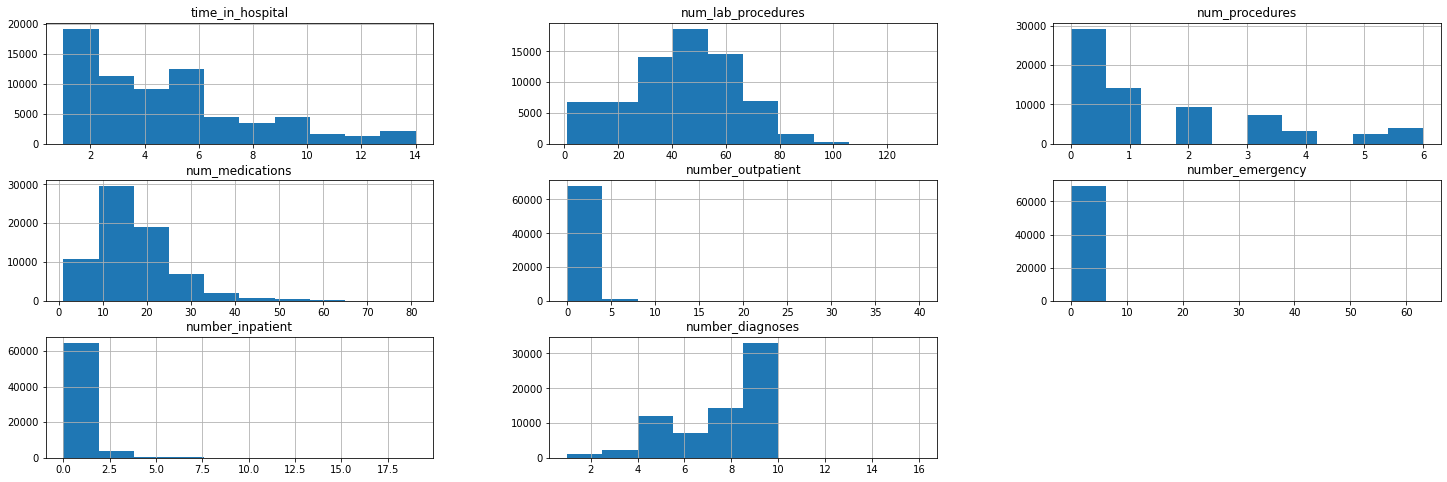

In [39]:
df_ingresos.hist(['time_in_hospital',	'num_lab_procedures',	'num_procedures',	'num_medications',	'number_outpatient',	'number_emergency',	'number_inpatient',	'number_diagnoses'], figsize=(25,8))

Otro aspecto a explorar para las variables numéricas es la correlación entre ellas. El mapa de calor a continuación muestra estas correlaciones en valores absolutos, a medida que pasamos del azul claro al morado, el valor absoluto de la correlación crece de 0 a 1. Por lo tanto, vemos que en general estas variables no tienen correlaciones fuertes.

Mayoría de las correlaciones es baja - > Buena salud de los datos

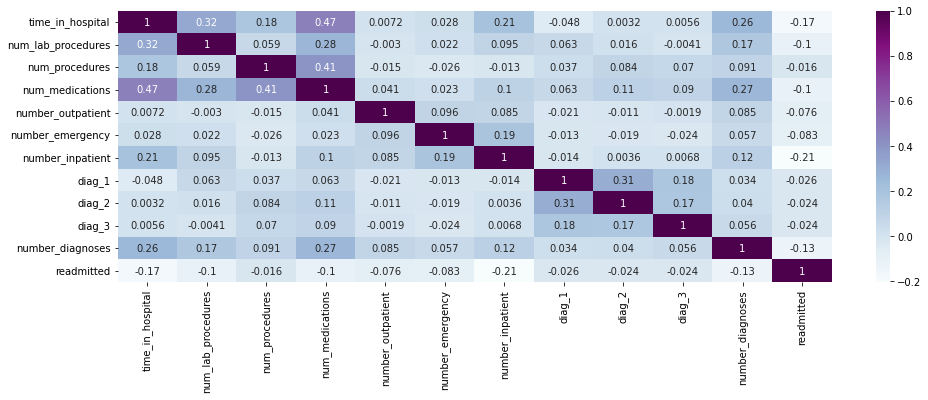

In [40]:
plt.figure(figsize = (16,5))
sns.heatmap(df_ingresos.corr(), cmap='BuPu', annot=True)

One Hot Encodig - Variables Categoricas

In [41]:
df_age = pd.get_dummies(df_ingresos['age'])
df_race = pd.get_dummies(df_ingresos['race'])
df_gender = pd.get_dummies(df_ingresos['gender'])
df_max_glu_serum = pd.get_dummies(df_ingresos['max_glu_serum'])
df_A1Cresult = pd.get_dummies(df_ingresos['A1Cresult'])
df_insulin = pd.get_dummies(df_ingresos['insulin'])
df_change = pd.get_dummies(df_ingresos['change'])
df_diabetesMed = pd.get_dummies(df_ingresos['diabetesMed'])
df_discharge_disposition_id = pd.get_dummies(df_ingresos['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(df_ingresos['admission_source_id'])
df_admission_type_id = pd.get_dummies(df_ingresos['admission_type_id'])

In [42]:
df_ingresos = pd.concat([df_ingresos, df_age, df_race, df_gender, df_insulin, df_diabetesMed, df_discharge_disposition_id, 
                         df_admission_source_id, df_admission_type_id], axis=1)
df_ingresos.drop(['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change','diabetesMed', 'discharge_disposition_id', 'admission_source_id',
                  'admission_type_id'], axis=1, inplace=True)

### **Feature Scaling for Numerical Variables**

In [43]:
from sklearn import preprocessing

In [44]:
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications','number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']
scaler = preprocessing.StandardScaler().fit(df_ingresos[feature_scale_cols])
data_scaler = scaler.transform(df_ingresos[feature_scale_cols])
data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=df_ingresos.index)
df_ingresos.drop(feature_scale_cols, axis=1, inplace=True)
df_ingresos = pd.concat([df_ingresos, data_scaler_df], axis=1)
X = df_ingresos.drop(['readmitted'], axis=1)
y = df_ingresos['readmitted']

### **Machine Learning**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

Accuracy is 0.60
Precision is 0.71
Recall is 0.68


In [48]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.67
Precision is 0.71
Recall is 0.87
